<a href="https://colab.research.google.com/github/GaurangRawat/Machine-Learning-Projects/blob/main/ML%20Algorithms/Lasso%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso , LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
diabetes = load_diabetes()

data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

In [4]:
data.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Applying Linear Regression**

---

In [6]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [7]:
y_pred

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858,  94.13865744, 168.43486358,
        53.5047888 , 206.63081659, 100.12925869, 130.66657085,
       219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
       207.35050182,  88.48340941,  70.43285917, 188.95914235,
       154.8868162 , 159.36170122, 188.31263363, 180.39094033,
        47.99046561, 108.97453871, 174.77897633,  86.36406656,
       132.95761215, 184.53819483, 173.83220911, 190.35858492,
       124.4156176 , 119.65110656, 147.95168682,  59.05405241,
        71.62331856, 107.68284704, 165.45365458, 155.00975931,
       171.04799096,  61.45761356,  71.66672581, 114.96732206,
        51.57975523, 167.57599528, 152.52291955,  62.95568515,
       103.49741722, 109.20751489, 175.64118426, 154.60296242,
        94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
       187.93203995, 206.49337474, 140.63167076, 105.59

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2900.193628493482
R^2 Score: 0.4526027629719195


In [9]:
# Display the coefficients
coef = pd.Series(lr.coef_, index=X.columns)

In [10]:
coef

,0
age,37.904021
sex,-241.964362
bmi,542.428759
bp,347.703844
s1,-931.488846
s2,518.062277
s3,163.419983
s4,275.317902
s5,736.198859
s6,48.670657


#**Applying Lasso Regression**

---

In [11]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2798.193485169719
R^2 Score: 0.4718547867276227


In [13]:
# Display the coefficients
coef = pd.Series(lasso.coef_, index=X.columns)

In [14]:
lasso.intercept_

151.57485282893947

In [15]:
coef

,0
age,0.000000
sex,-152.664779
bmi,552.697775
bp,303.365158
s1,-81.365007
s2,-0.000000
s3,-229.255776
s4,0.000000
s5,447.919525
s6,29.642617


#**Sparcity In Lasso**

---

In [16]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler


In [17]:
np.random.seed()

In [18]:
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=42)

In [19]:
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
data = pd.DataFrame(X, columns=feature_names)
data['target'] = y

data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,target
0,-0.353273,-1.469201,-0.748674,0.568326,0.442359,-0.209873,0.482965,-0.086548,-0.276123,0.328453,...,-0.721595,-0.627373,2.202578,1.795924,-0.397011,1.392781,-0.719678,0.244672,-2.457507,-234.747811
1,0.257256,2.140309,-0.630692,-0.572608,-0.171383,0.338625,1.846603,-0.085243,-0.202000,0.927974,...,0.347883,-0.447221,-0.185935,0.549527,0.739119,-1.233837,-1.265086,-0.095604,-0.745764,51.233025
2,0.781233,-0.657438,1.976438,-0.169421,-0.920985,0.474556,-0.210418,0.612659,-0.205452,0.967930,...,-0.151687,-0.320438,0.389994,1.184124,-1.637070,-0.513537,1.676920,-0.630121,-1.034070,-106.716029
3,-2.358464,0.204154,-1.579345,0.289784,-0.174711,-0.024830,-1.862864,-0.585063,-0.133526,0.454331,...,-0.825769,-0.228151,-0.014925,0.435048,0.362451,-0.488274,0.282450,2.384598,-0.429833,-55.619155
4,-0.448543,1.635798,0.564842,0.211397,-0.318748,-1.472037,0.644518,0.808036,-1.389299,-0.114802,...,0.305243,-0.048965,-0.739771,-0.143259,1.040062,-1.400071,0.711411,1.122374,1.378470,-111.074505


In [20]:
len(data.columns)

101

In [21]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

In [24]:
coef = pd.Series(lasso.coef_, index=X.columns)

In [25]:
coef

,0
feature_0,0.0
feature_1,0.0
feature_2,-0.0
feature_3,0.0
feature_4,0.0
...,...
feature_95,-0.0
feature_96,-0.0
feature_97,0.0
feature_98,-0.0


In [26]:
non_zero_coef = (coef != 0).sum()
print(f"Number of non-zero coefficients: {non_zero_coef}")

Number of non-zero coefficients: 10


In [27]:
### Initially total input columns : 100
### Non-zero coefficient columns : 10
### Zero coefficient columns : 90

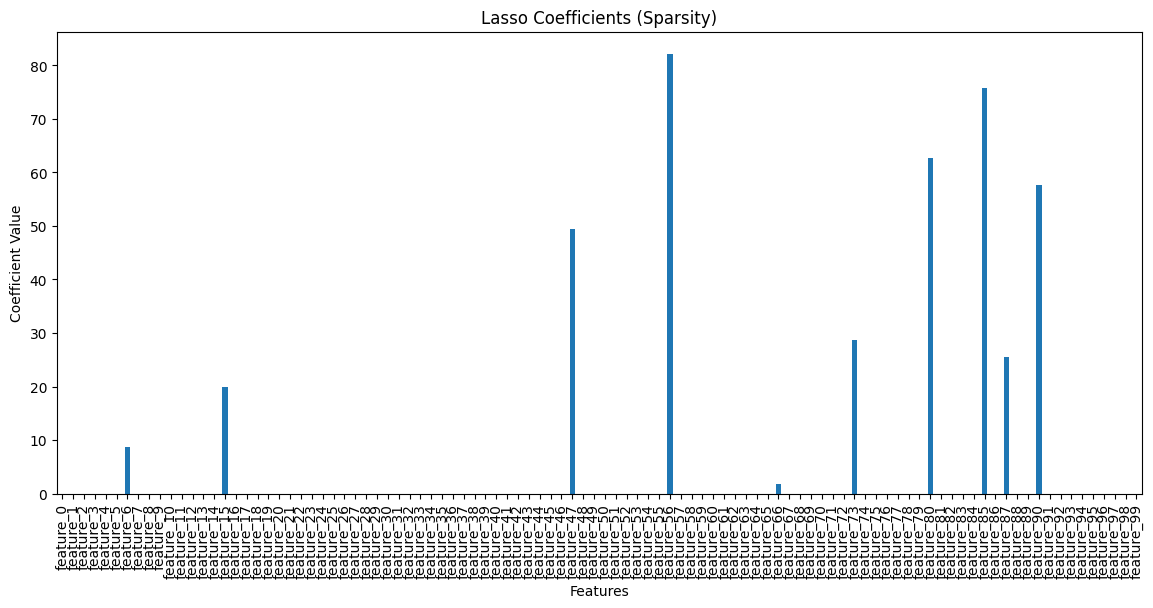

In [28]:
plt.figure(figsize=(14, 6))
coef.plot(kind='bar')
plt.title('Lasso Coefficients (Sparsity)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()